In [3]:
"""
    We will study a heursitic for obtaining a relevant number of clusters
    in a clustering situation.
    The clustering will be performed by a Spectral Clustering.
    Spectral Clustering works with an adjacency matrix
    or a similarity matrix.
"""

from sklearn.cluster import SpectralClustering
import numpy as np
import matplotlib.pyplot as plt

# load the data
adjacency_matrix = np.load("data/adjacency_matrix.npy")
# nb datapoints
nb_datapoints = adjacency_matrix.shape[0]
dataset = [x for x in range(nb_datapoints)]


def cluster_and_compute_normalized_cut(nb_clusters, adjacency_matrix):
    # setup spectral clustering
    sc = SpectralClustering(nb_clusters, affinity='precomputed')
    # apply the Spectral Clustering to the adjacency matrix
    sc.fit_predict(adjacency_matrix)

    clusters = list()
    for cluter_index in range(nb_clusters):
        cluster = np.where(sc.labels_ == cluter_index)[0]
        clusters.append(cluster)

    # compute the normalized cut of the clustering
    normalized_cut = 0
    for cluster in clusters:
        # points that are not in this cluster
        complementary = [x for x in dataset if x not in cluster]

        # compute the cut of the cluster
        # connections with points outside itsself
        cluster_cut = 0
        for point in cluster:
            point_outside_connections = sum(adjacency_matrix[point, complementary])
            cluster_cut += point_outside_connections

        # compute the degree of the cluster
        # it is the sum of the degree of all its nodes
        cluster_degree = 0
        for point in cluster:
            point_degree = sum(adjacency_matrix[point, :])
            cluster_degree += point_degree

        # compute the normalized cut
        cluster_normalized_cut = cluster_cut/cluster_degree
        normalized_cut += cluster_normalized_cut

    print(f"normalized cut: {normalized_cut}")
    return normalized_cut

nb clusters: 1
normalized cut: 0.0
nb clusters: 2
normalized cut: 0.0
nb clusters: 3
normalized cut: 0.012394755685044813
nb clusters: 4
normalized cut: 0.6230709122686746
nb clusters: 5
normalized cut: 1.3935183073693973
nb clusters: 6
normalized cut: 2.273690510872282
nb clusters: 7


/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/opt/conda/lib/python3.7/site-packages/sklea

normalized cut: 3.2602107120324897
nb clusters: 8
normalized cut: 4.146145003291958
nb clusters: 9
normalized cut: 5.126636101676963


/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


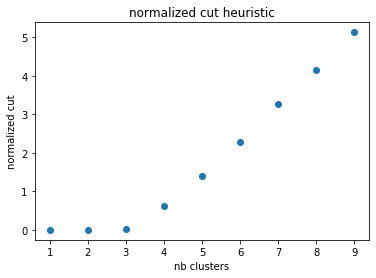

In [6]:
normalized_cuts = list()
max_nb_clusters = 10
tried_nb_clusters = range(1, max_nb_clusters)

for nb_clusters in tried_nb_clusters:
    print(f"======\nnb clusters: {nb_clusters}")
    normalized_cuts.append(cluster_and_compute_normalized_cut(nb_clusters, adjacency_matrix))

plt.plot(tried_nb_clusters, normalized_cuts, 'o')
plt.title("normalized cut heuristic")
plt.xlabel("nb clusters")
plt.ylabel("normalized cut")
plt.show()